# Merging datasets - adding Henry's Law Constants and Melting Points

In [1]:
# importing modules that will be used

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
# load aqsoldb csv file as a pandas dataframe
aqsoldb = pd.read_csv('aqsoldb.csv')

In [3]:
# inspect dataframes
aqsoldb.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


### Merging Datasets

In [4]:
# loading henry's law dataset into pandas dataframe
henry_db = pd.read_csv('hcp_values.csv')

In [5]:
henry_db

,Species,InChIKey,Hcp
0,oxygen,MYMOFIZGZYHOMD-UHFFFAOYSA-N,0.000012
1,ozone,CBENFWSGALASAD-UHFFFAOYSA-N,0.000100
2,hydrogen atom,YZCKVEUIGOORGS-UHFFFAOYSA-N,0.000003
3,hydrogen,UFHFLCQGNIYNRP-UHFFFAOYSA-N,0.000008
4,deuterium,UFHFLCQGNIYNRP-VVKOMZTBSA-N,0.000008
...,...,...,...
4627,tetramethyl lead,XOOGZRUBTYCLHG-UHFFFAOYSA-N,0.000016
4628,ethyltrimethylplumbane,KHQJREYATBQBHY-UHFFFAOYSA-N,0.000028
4629,diethyldimethylplumbane,OLOAJSHVLXNSQV-UHFFFAOYSA-N,0.000021
4630,triethylmethylplumbane,KGFRUGHBHNUHOS-UHFFFAOYSA-N,0.000016


In [6]:
# adding Hcp where InChIKeys match up
aqsoldb = aqsoldb.join(henry_db.set_index('InChIKey'), on='InChIKey')

In [7]:
aqsoldb

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,Species,Hcp
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334,NaN,NaN
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248,NaN,NaN
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065,NaN,NaN
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666,NaN,NaN
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,G1,264.369,...,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893,NaN,NaN
9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,G1,444.440,...,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975,NaN,NaN
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720e+00,251.049732,5-methyl-2-(1-methylethyl)-phenol,3.0
9980,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,G1,454.611,...,2.0,0.0,0.0,2.0,63.95,198.569223,2.023333e+00,938.203977,NaN,NaN


In [8]:
# how many have matched?
matched = aqsoldb[aqsoldb['Hcp'].notnull()]
matched
# 2399 have a match

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,Species,Hcp
5,A-10,vinyltoluene,"InChI=1S/C9H10/c1-3-9-6-4-5-8(2)7-9/h3-7H,1H2,2H3",JZHGRUMIRATHIU-UHFFFAOYSA-N,Cc1cccc(C=C)c1,-3.123150,0.000000,1,G1,118.179,...,1.0,0.0,0.0,1.0,0.00,55.836626,3.070761,211.033225,1-ethenyl-3-methylbenzene,3.100000e-03
16,A-24,2-(4-chloro-2-methylphenoxy)propanoic acid,InChI=1S/C10H11ClO3/c1-6-5-8(11)3-4-9(6)14-7(2...,WNTGYJSOUMFZEP-UHFFFAOYSA-N,CC(Oc1ccc(Cl)cc1C)C(O)=O,-2.466031,0.060621,4,G5,214.648,...,1.0,0.0,0.0,1.0,46.53,87.263739,2.817665,349.220389,mecoprop,9.000000e+03
18,A-26,1-chloro-3-(trifluoromethyl)benzene,"InChI=1S/C7H4ClF3/c8-6-3-1-2-5(4-6)7(9,10)11/h...",YTCGOUNVIAWCMG-UHFFFAOYSA-N,FC(F)(F)c1cccc(Cl)c1,-3.411514,0.000000,1,G1,180.556,...,1.0,0.0,0.0,1.0,0.00,66.596218,3.059902,254.107753,1-chloro-3-(trifluoromethyl)benzene,2.900000e-04
21,A-29,1-methyl-4-(propan-2-ylidene)cyclohex-1-ene,"InChI=1S/C10H16/c1-8(2)10-6-4-9(3)5-7-10/h4H,5...",MOYAFQVGZZPNRA-UHFFFAOYSA-N,CC(C)=C1CCC(=CC1)C,-4.287343,0.131231,3,G5,136.238,...,0.0,0.0,1.0,1.0,0.00,63.638693,2.668730,178.214991,1-methyl-4-(1-methylethylidene)-cyclohexene,3.800000e-04
27,A-36,"(1S,5S)-6,6-dimethyl-2-methylidenebicyclo[3.1....","InChI=1S/C10H16/c1-7-4-5-8-6-9(7)10(8,2)3/h8-9...",WTARULDDTDQWMU-UHFFFAOYSA-N,CC1(C)C2CCC(=C)C1C2,-4.292313,1.247787,3,G4,136.238,...,0.0,3.0,3.0,3.0,0.00,63.322465,2.231081,174.477332,$\beta$-pinene,1.600000e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,I-63,papaverine,InChI=1S/C20H21NO4/c1-22-17-6-5-13(10-18(17)23...,XQYZDYMELSJDRZ-UHFFFAOYSA-N,c1(nccc2cc(c(OC)cc12)OC)Cc1cc(c(cc1)OC)OC,-3.870000,0.790000,2,G2,339.391,...,3.0,0.0,0.0,3.0,49.81,146.668701,2.039871,892.243703,papaverine,1.300000e+07
9967,I-66,phenobarbital,InChI=1S/C12H12N2O3/c1-2-12(8-6-4-3-5-7-8)9(15...,DDBREPKUVSBGFI-UHFFFAOYSA-N,C1(NC(C(c2ccccc2)(C(=O)N1)CC)=O)=O,-2.290000,0.095670,5,G5,232.239,...,1.0,1.0,1.0,2.0,75.27,98.199515,2.535973,461.783925,phenobarbital,5.800000e+08
9974,I-79,sulfamethazine,InChI=1S/C12H14N4O2S/c1-8-7-9(2)15-12(14-8)16-...,ASWVTGNCAZCNNR-UHFFFAOYSA-N,S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1,-2.730000,0.230750,2,G3,278.337,...,2.0,0.0,0.0,2.0,97.97,111.308206,2.330509,675.919365,sulfamethazine,3.200000e+07
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720,251.049732,5-methyl-2-(1-methylethyl)-phenol,3.000000e+00


In [9]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

ModuleNotFoundError: No module named 'rdkit'

In [ ]:
# adding a Mol column into the dataframe which can be utilised by rdkit
PandasTools.AddMoleculeColumnToFrame(aqsoldb, 'SMILES', 'Mol')

In [ ]:
# calculate number of aromatic atoms
aqsoldb['NumAromaticAtoms'] = [sum(row.GetAtomWithIdx(i).GetIsAromatic() for i in range(row.GetNumAtoms())) for row in aqsoldb['Mol']]

In [ ]:
aqsoldb['NumAromaticAtoms']

In [ ]:
# calculating aromatic proportion (AP) descriptor
def AP(df):
    return df['NumAromaticAtoms'] / df['HeavyAtomCount']

aqsoldb['AP'] = aqsoldb.apply(AP, axis=1)

In [ ]:
aqsoldb.dtypes

In [ ]:
# histogram of solubility values to see spread of data
sns.histplot(data=aqsoldb, x='AP').set_title('AP distribution in AqSolDB')
plt.xlabel('Aromatic Proportion')
sns.despine()
plt.savefig('ap_distribution.jpg', dpi=300, bbox_inches='tight')

In [ ]:
aqsoldb.to_csv('curated_aqsoldb.csv', index=False)

#### EDA

In [ ]:
# Solubility vs AP
sns.scatterplot(data=aqsoldb, x='AP', y='Solubility').set_title('The effect of aromatic proportion on solubility')

There really isn't any correlation here.

In [ ]:
# Solubility vs NumRotatableBonds
sns.scatterplot(data=aqsoldb, x='NumRotatableBonds', y='Solubility').set_title('The effect of number of rotatable bonds on solubility')

No real correlation here either.

In [ ]:
# Solubility vs MLogP
sns.scatterplot(data=aqsoldb, x='MolLogP', y='Solubility').set_title('The effect of number of MLogP on solubility')

somewhat negative correlation

### Adding Melting Point Data

In [10]:
mps = pd.read_csv('mp_celsius.csv')

In [11]:
# adding melting points where InChIKeys match up
aqsoldb = aqsoldb.join(mps.set_index('InChIKey'), on='InChIKey')

In [12]:
aqsoldb['Melting Point']

0         NaN
1       175.5
2        47.5
3         NaN
4         NaN
        ...  
9977      NaN
9978      NaN
9979     51.5
9980      NaN
9981    161.0
Name: Melting Point, Length: 10063, dtype: float64

There are 3590 compounds which have a melting point.

There are more values than there should be - lets check for duplicates

In [24]:
aqsoldb[aqsoldb['InChIKey'].duplicated()]

,index,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,...,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,Species,Hcp,CID,Melting Point
193,192,A-329,"N',N'''''-hexane-1,6-diylbis[N-(4-chlorophenyl...",InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...,GHXZTYHSJHQHIJ-UHFFFAOYSA-N,NC(Nc1ccc(Cl)cc1)=NC(N)=NCCCCCCN=C(N)N=C(N)Nc2...,-2.800595,0.000000,1,G1,...,0.0,2.0,177.58,208.785028,1.605501,931.485721,chlorhexidine,9.000000e+24,88536661.0,134.0
194,192,A-329,"N',N'''''-hexane-1,6-diylbis[N-(4-chlorophenyl...",InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...,GHXZTYHSJHQHIJ-UHFFFAOYSA-N,NC(Nc1ccc(Cl)cc1)=NC(N)=NCCCCCCN=C(N)N=C(N)Nc2...,-2.800595,0.000000,1,G1,...,0.0,2.0,177.58,208.785028,1.605501,931.485721,chlorhexidine,9.000000e+24,2713.0,134.0
195,192,A-329,"N',N'''''-hexane-1,6-diylbis[N-(4-chlorophenyl...",InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...,GHXZTYHSJHQHIJ-UHFFFAOYSA-N,NC(Nc1ccc(Cl)cc1)=NC(N)=NCCCCCCN=C(N)N=C(N)Nc2...,-2.800595,0.000000,1,G1,...,0.0,2.0,177.58,208.785028,1.605501,931.485721,chlorhexidine,9.000000e+24,5360566.0,134.0
196,192,A-329,"N',N'''''-hexane-1,6-diylbis[N-(4-chlorophenyl...",InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...,GHXZTYHSJHQHIJ-UHFFFAOYSA-N,NC(Nc1ccc(Cl)cc1)=NC(N)=NCCCCCCN=C(N)N=C(N)Nc2...,-2.800595,0.000000,1,G1,...,0.0,2.0,177.58,208.785028,1.605501,931.485721,chlorhexidine,9.000000e+24,5353524.0,134.0
312,307,A-511,decanoic acid,InChI=1S/C10H20O2/c1-2-3-4-5-6-7-8-9-10(11)12/...,GHVNFZFCNZKVNT-UHFFFAOYSA-N,CCCCCCCCCC(O)=O,-3.445216,0.192551,2,G3,...,0.0,0.0,37.30,74.979486,2.861387,110.406207,decanoic acid,6.500000e+00,2969.0,31.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9757,9680,F-1146,2-amino-3-(1H-indol-3-yl)propanoic acid,InChI=1S/C11H12N2O2/c12-9(11(14)15)5-7-6-13-10...,QIVBCDIJIAJPQS-UHFFFAOYSA-N,NC(CC1=CNC2=C1C=CC=C2)C(=O)O,-1.770000,0.293500,2,G3,...,0.0,2.0,79.11,86.712701,2.323487,490.048508,NaN,NaN,1148.0,293.0
9939,9861,G-1069,Sulfanilamide,"InChI=1S/C6H8N2O2S/c7-5-1-3-6(4-2-5)11(8,9)10/...",FDDDEECHVMSUSB-UHFFFAOYSA-N,Nc1ccc(cc1)S(N)(=O)=O,-1.340000,0.010500,2,G3,...,0.0,1.0,86.18,64.871960,3.201516,341.349962,sulfanilamide,6.600000e+04,5333.0,165.5
10019,9940,I-10,amodiaquine,InChI=1S/C20H22ClN3O/c1-3-24(4-2)13-14-11-16(6...,OVCDSSHSILBFBN-UHFFFAOYSA-N,c1(c(CN(CC)CC)cc(cc1)Nc1ccnc2c1ccc(c2)Cl)O,-5.790000,0.000000,1,G1,...,0.0,3.0,48.39,152.621716,1.907886,877.944307,NaN,NaN,3647519.0,208.0
10035,9955,I-37,famotidine,"InChI=1S/C8H15N7O2S3/c9-6(15-20(12,16)17)1-2-1...",XUFQPHANEAPEMJ-UHFFFAOYSA-N,N\C(CCSCc1csc(\N=C(\N)N)n1)=N\S(=O)(N)=O,-2.650000,0.165000,2,G3,...,0.0,1.0,175.83,124.285596,2.366985,603.341617,NaN,NaN,5702160.0,163.5


We can see that the duplicated rows are due to them having different CIDs - but their melting points are the same even so so we will take these for the same compound as they have been matched up according to InChIKey. So we will keep the first rows and delete any following duplicates.

In [25]:
aqsoldb.drop_duplicates(subset=['InChIKey'], inplace=True)

In [26]:
aqsoldb.reset_index(inplace=True)

In [27]:
aqsoldb

,level_0,index,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,...,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,Species,Hcp,CID,Melting Point
0,0,0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,...,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334,NaN,NaN,NaN,NaN
1,1,1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,...,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248,NaN,NaN,67222.0,175.5
2,2,2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,...,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065,NaN,NaN,7726.0,47.5
3,3,3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,...,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666,NaN,NaN,NaN,NaN
4,4,4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,...,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,10058,9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,...,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893,NaN,NaN,NaN,NaN
9978,10059,9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,...,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975,NaN,NaN,NaN,NaN
9979,10060,9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,...,0.0,1.0,20.23,67.685405,3.092720e+00,251.049732,5-methyl-2-(1-methylethyl)-phenol,3.0,6989.0,51.5
9980,10061,9980,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,...,0.0,2.0,63.95,198.569223,2.023333e+00,938.203977,NaN,NaN,NaN,NaN


In [28]:
aqsoldb.to_csv('curated_aqsoldb.csv', index=False)

### Predicting Melting Point using General Solubility Equation

The General Solubility Equation (GSE) is log S = 0.5 - (0.01 * melting point (in celsius) - 25) - log P

In [29]:
def gse(df):
    log_S = 0.5 - 0.01 * (df['Melting Point'] - 25) - df['MolLogP']
    df['GSE LogS'] = log_S
    return df

aqsoldb = aqsoldb.apply(gse, axis=1)

In [38]:

results = aqsoldb[~aqsoldb['GSE LogS'].isnull()]

In [39]:
results

,level_0,index,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,...,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,Species,Hcp,CID,Melting Point,GSE LogS
1,1,1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,...,3.0,29.10,75.183563,2.582996,511.229248,NaN,NaN,67222.0,175.5,-3.41050
2,2,2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,...,1.0,17.07,58.261134,3.009782,202.661065,NaN,NaN,7726.0,47.5,-1.87750
5,5,5,A-10,vinyltoluene,"InChI=1S/C9H10/c1-3-9-6-4-5-8(2)7-9/h3-7H,1H2,2H3",JZHGRUMIRATHIU-UHFFFAOYSA-N,Cc1cccc(C=C)c1,-3.123150,0.000000,1,...,1.0,0.00,55.836626,3.070761,211.033225,1-ethenyl-3-methylbenzene,3.100000e-03,7529.0,-86.3,-1.02502
8,8,8,A-14,bis(4-fluorophenyl)methanone,InChI=1S/C13H8F2O/c14-11-5-1-9(2-6-11)13(16)10...,LSQARZALBDFYQZ-UHFFFAOYSA-N,Fc1ccc(cc1)C(=O)c2ccc(F)cc2,-4.396652,0.431513,2,...,2.0,17.07,91.346032,2.315628,452.960733,NaN,NaN,9582.0,103.5,-3.48080
10,10,10,A-17,4-(dimethylamino)benzaldehyde,InChI=1S/C9H11NO/c1-10(2)9-5-3-8(7-11)4-6-9/h3...,BGNGWHSBYQYVRX-UHFFFAOYSA-N,CN(C)c1ccc(C=O)cc1,-2.282769,0.000000,1,...,1.0,20.31,66.447585,2.909823,238.244575,NaN,NaN,7479.0,74.5,-1.56010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,10052,9971,I-75,ranitidine,InChI=1S/C13H22N4O3S/c1-14-13(9-17(18)19)15-6-...,VMXUWOKSQNHOCA-UKTHLTGXSA-N,S(Cc1oc(CN(C)C)cc1)CCN\C(NC)=C\N(=O)=O,-2.500000,0.000000,1,...,1.0,83.58,128.456252,2.218277,473.736359,NaN,NaN,3001055.0,69.5,-1.40400
9974,10055,9974,I-79,sulfamethazine,InChI=1S/C12H14N4O2S/c1-8-7-9(2)15-12(14-8)16-...,ASWVTGNCAZCNNR-UHFFFAOYSA-N,S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1,-2.730000,0.230750,2,...,2.0,97.97,111.308206,2.330509,675.919365,sulfamethazine,3.200000e+07,5327.0,198.5,-2.71144
9976,10057,9976,I-83,sulindac_form_II,InChI=1S/C20H17FO3S/c1-12-17(9-13-3-6-15(7-4-1...,MLKXDPUZXIRXEP-RQZCQDPDSA-N,CC1=C(CC(O)=O)c2cc(F)ccc2C\1=C\c1ccc(cc1)S(C)=O,-4.500000,0.410000,2,...,3.0,54.37,147.518542,2.101112,939.913669,NaN,NaN,1548885.0,183.0,-5.44550
9979,10060,9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,...,1.0,20.23,67.685405,3.092720,251.049732,5-methyl-2-(1-methylethyl)-phenol,3.000000e+00,6989.0,51.5,-2.58902


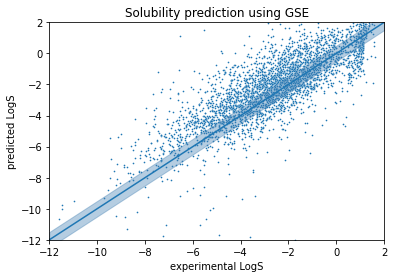

In [41]:
# plot results
sns.scatterplot(data=results, x='Solubility', y='GSE LogS', s=3).set(title='Solubility prediction using GSE', xlabel='experimental LogS', ylabel='predicted LogS')

plt.xlim(-12, 2)
plt.ylim(-12, 2)

# plot x=y line showing where accurate predictions lie
sns.lineplot(x=[-12, 2], y=[-12, 2], alpha=1)

# shaded areas show values that lie within the accepted +- 0.5 error zone
exp_value = np.arange(-12, 3)
upper_bound = exp_value + 0.5
lower_bound = exp_value - 0.5
plt.fill_between(exp_value, upper_bound, lower_bound, color='steelblue', alpha=0.4)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
mean_squared_error(results['Solubility'], results['GSE LogS'], squared=False)

1.9736456863148002

In [48]:
r2_score(results['Solubility'], results['GSE LogS'])

0.22427655452919137